# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [2]:
#laod the datasets into dataframe
df = pd.read_csv('../Superstore Sales Dataset.csv')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#show the top five rows
df.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
#We have 18 columns in the dataset. Let's take a look what are they.
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales'], dtype=object)

In [6]:
#check if there are nulls in the dataframe
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
# Locate the rows with null values for further statistics
#df[df.isnull().any(axis=1)]

In [8]:
# in Static methods, we don't need postal code but we'll drop them anyway
df = df.dropna()

In [9]:
#lets see the statistics of numeric values in the data
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


In [10]:
# Check the types of the DataFrame columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [11]:
# change the types of each column in the dataframe to appropriate types

df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

df['Postal Code'] = df['Postal Code'].astype(int) #Postal code consists of five numbers only, shouldn't be float64

In [12]:
#We have a good 4-year time-series according with their sales data.
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [13]:
# sort the dataset according to Order Date
df = df.sort_values('Order Date').reset_index(drop=True)
df['Row ID'] = range(1, len(df) + 1) # restart the 'Row ID' column with sequential values 
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,2,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2,3,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
3,4,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
4,5,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9785,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
9785,9786,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
9786,9787,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
9787,9788,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904


# Data Processing


In this, we found that we can devide the dataset according to the product categories.

Note that, the sales data on the same date should be integrated together.

In [14]:
#Let's see how many categories of products we have in the dataset
df.Category.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [15]:
#check the counts of each category
df.Category.value_counts()

Category
Office Supplies    5903
Furniture          2076
Technology         1810
Name: count, dtype: int64

We found that there is an interesting column Category which can divided the data into several subsets according to the product categories.

Lets start with Office Supplies as it has the highest counts

In [16]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']
technology = df.loc[df['Category'] == 'Technology']

In [17]:
#We have a good 4-year office supplies sales data.
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [18]:
#lets select the 'Order Date' and 'Sales' only 
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,3.540
2,2015-01-04,272.736
3,2015-01-04,11.784
4,2015-01-05,19.536
...,...,...
9782,2018-12-30,209.300
9783,2018-12-30,20.720
9785,2018-12-30,52.776
9787,2018-12-30,13.904


In [19]:
furniture = furniture[['Order Date','Sales']]
furniture

,Order Date,Sales
5,2015-01-06,2573.820
14,2015-01-07,76.728
18,2015-01-10,51.940
20,2015-01-11,9.940
23,2015-01-13,333.999
...,...,...
9776,2018-12-29,300.980
9777,2018-12-29,258.750
9779,2018-12-29,101.120
9781,2018-12-29,68.460


In [20]:
technology = technology[['Order Date','Sales']]
technology

,Order Date,Sales
11,2015-01-06,391.980
12,2015-01-06,755.960
16,2015-01-09,31.200
31,2015-01-13,646.740
33,2015-01-15,149.950
...,...,...
9742,2018-12-25,90.480
9750,2018-12-27,164.388
9768,2018-12-28,14.850
9771,2018-12-29,302.376


In [21]:
#the sales data on the same date should be integrated together, lets sum the sales of the same order date
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,685.340
4,2015-01-07,10.430
...,...,...
1137,2018-12-26,814.594
1138,2018-12-27,13.248
1139,2018-12-28,1091.244
1140,2018-12-29,282.440


In [22]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2015-01-06,2573.8200
1,2015-01-07,76.7280
2,2015-01-10,51.9400
3,2015-01-11,9.9400
4,2015-01-13,879.9390
...,...,...
872,2018-12-24,1393.4940
873,2018-12-25,832.4540
874,2018-12-28,551.2568
875,2018-12-29,2330.7180


In [23]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology

,Order Date,Sales
0,2015-01-06,1147.940
1,2015-01-09,31.200
2,2015-01-13,646.740
3,2015-01-15,149.950
4,2015-01-16,124.200
...,...,...
812,2018-12-25,401.208
813,2018-12-27,164.388
814,2018-12-28,14.850
815,2018-12-29,302.376


In [24]:
#set order date as index to see the time series data
office_supplies.set_index('Order Date').index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-09', '2015-01-10', '2015-01-13',
               '2015-01-16', '2015-01-18',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1142, freq=None)

In [25]:
#set order date as index to see the time series data
furniture.set_index('Order Date').index

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14', '2015-01-16', '2015-01-19',
               '2015-01-20', '2015-01-26',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=877, freq=None)

In [26]:
#set order date as index to see the time series data
technology.set_index('Order Date').index

DatetimeIndex(['2015-01-06', '2015-01-09', '2015-01-13', '2015-01-15',
               '2015-01-16', '2015-01-20', '2015-01-26', '2015-02-01',
               '2015-02-02', '2015-02-06',
               ...
               '2018-12-18', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=817, freq=None)

# For Technology Category

In [27]:
import pandas as pd

def preprocess_office_supplies_data(data):
    data = data.set_index('Order Date')
    data.index
    # Resample the data by month and calculate the sum of sales
    data = data['Sales'].resample('MS').mean()

    # Reset the index to separate the year and month into separate columns
    data = data.reset_index()
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Quarter'] = data['Order Date'].dt.quarter

    # Extract the desired columns for Forecasting Methods
    data = data.loc[:, ["Order Date", "Month", "Sales"]]

    # Group the sales by year and quarter
    data = data.groupby(['Order Date', 'Month'])['Sales'].sum()

    data = data.reset_index()

    # Set year as index
    data.set_index('Order Date', inplace=True)
    data.insert(1, 'Period_t', range(1, len(data) + 1))

    return data


office_supplies = preprocess_office_supplies_data(office_supplies)
# Save a copy for Adaptive Forecasting
#office_supplies.to_csv('Adaptive Forecasting/office_supplies.csv', index=True)


In [28]:
office_supplies.tail()

,Month,Period_t,Sales
Order Date,,,
2018-08-01,8,44,1146.137077
2018-09-01,9,45,1128.840107
2018-10-01,10,46,873.400000
2018-11-01,11,47,1124.012036
2018-12-01,12,48,1022.000414


In [29]:
#select data from all rows [:] and starting from second columnn at index = 1 [1:] to drop 'Quarter' column
monthly_sales = office_supplies.iloc[:, 2:]
period = office_supplies.iloc[:, 1:] 
monthly_sales.head() 


,Sales
Order Date,
2015-01-01,285.008235
2015-02-01,63.042588
2015-03-01,391.020682
2015-04-01,477.777130
2015-05-01,324.165455


In [30]:
period = period.set_index('Period_t') #set index to 'Period_t' to get a good plot
period.head()

,Sales
Period_t,
1,285.008235
2,63.042588
3,391.020682
4,477.777130
5,324.165455


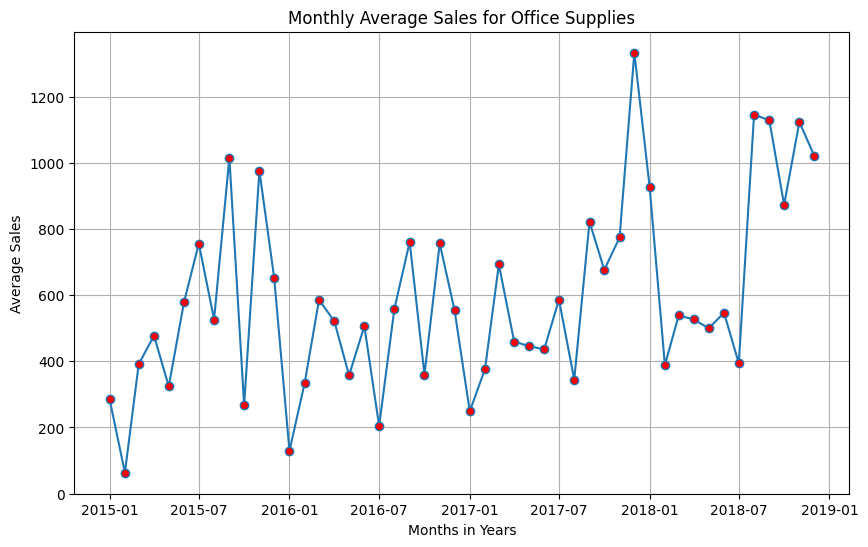

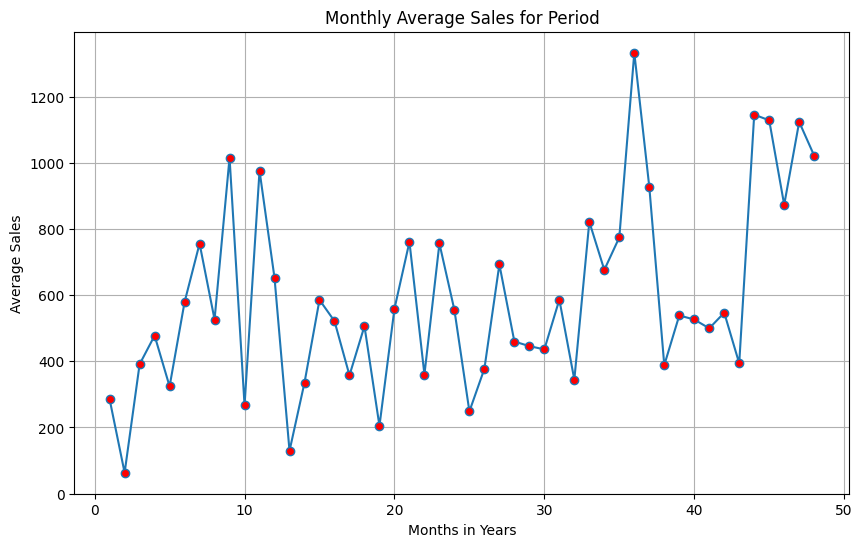

In [31]:
import matplotlib.pyplot as plt

# Plot for office supplies
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111)
ax1.plot(office_supplies['Sales'], marker='.', mfc='red', ms=12)
ax1.set_xlabel('Months in Years')
ax1.set_ylabel('Average Sales')
ax1.set_title('Monthly Average Sales for Office Supplies')
ax1.grid(True)

# Plot for period
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111)
ax2.plot(period['Sales'], marker='.', mfc='red', ms=12)
ax2.set_xlabel('Months in Years')
ax2.set_ylabel('Average Sales')
ax2.set_title('Monthly Average Sales for Period')
ax2.grid(True)

plt.show()


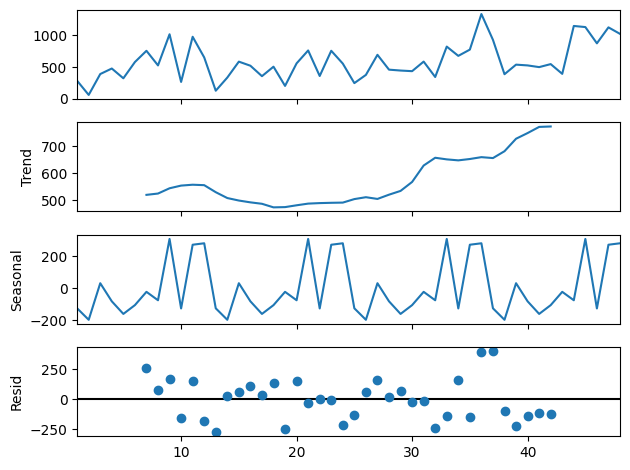

In [32]:
#Decompose data into observation, trend, seasonal and residual
decompose_data = seasonal_decompose(period, period = 12)
decompose_data.plot()
plt.show()

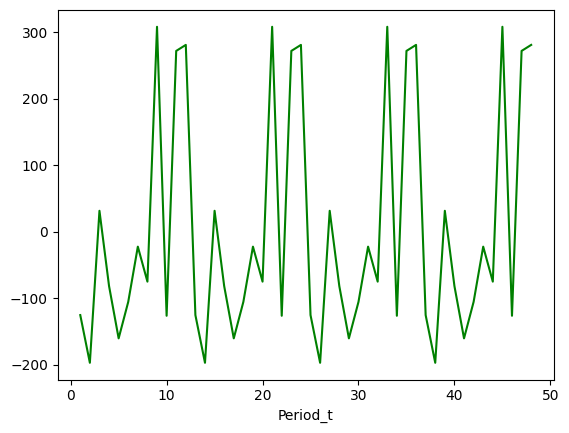

In [33]:
#Visualizing seasonal pattern
seasonality = decompose_data.seasonal
seasonality.plot(color = 'green')
plt.show()

In [34]:

#generate Deseasonalizing Demand in a new column
period['Deseasonalized_data'] = decompose_data.trend
period

,Sales,Deseasonalized_data
Period_t,,
1,285.008235,NaN
2,63.042588,NaN
3,391.020682,NaN
4,477.777130,NaN
5,324.165455,NaN
6,579.199500,NaN
7,756.060400,519.679569
8,526.441714,524.540066
9,1015.677704,544.007240


In [35]:
period = period.fillna(0) #fill missing null values with 0
period = period.reset_index() # resetting index of the dataframe

#discard rows where 'Deseasonalized_data' is null
data_x = period.loc[6:41,:]
data_x 

,Period_t,Sales,Deseasonalized_data
6,7,756.060400,519.679569
7,8,526.441714,524.540066
8,9,1015.677704,544.007240
9,10,267.078815,553.946790
10,11,976.414667,557.167472
11,12,652.172769,555.533050
12,13,129.198571,529.526175
13,14,335.504188,507.898334
14,15,585.771261,498.645728
15,16,521.575750,491.920062


<Axes: xlabel='Period_t'>

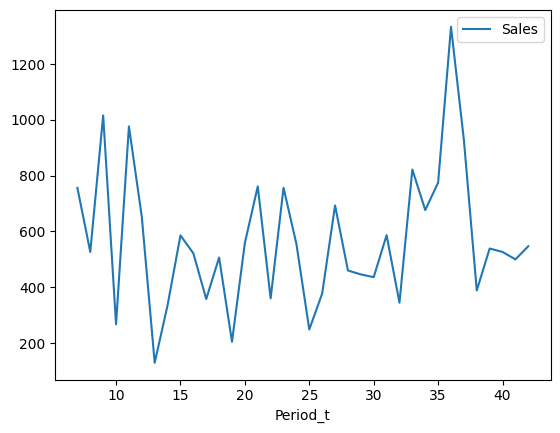

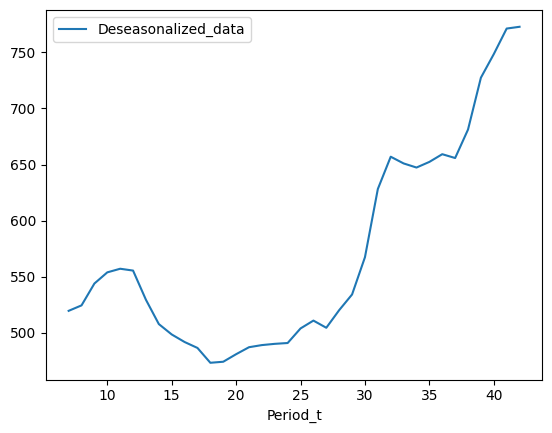

In [36]:
data_x.plot('Period_t','Sales')
data_x.plot('Period_t','Deseasonalized_data')

### Linear Regression Model

In [37]:
#create var *x* to store array of values from *'Deseasonalized_data'* in 2 dimension
x = np.array(data_x['Period_t']).reshape((-1,1))

#create var *y* to store array of values from *'Period_t'*
y = np.array(data_x['Deseasonalized_data'])

In [38]:
x, y #Display the contents of array x, y

(array([[ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42]], dtype=int64),
 array([519.67956892, 524.54006623, 544.00724033, 553.94679027,
        557.16747215, 555.53305036, 529.52617504, 507.89833393,
        498.64572762, 491.92006157, 486.62725481, 473.41597915,
        474.34380528, 481.06260792, 487.27803461, 489.1743664 ,
        490.28090447, 491.02474855, 504.00453864, 510.99240996,
        504.59473214, 520.30697231, 534.25471762, 567.44168917,
        628.17797709, 656.94304724, 650.96169405, 647.30289884,
        652.32182274, 659.1861915

In [39]:
model = LinearRegression()  #define model as LinearRegression

In [40]:
#fit x, y values into LineareRegression model
model.fit(x,y)

LinearRegression()

In [41]:
model.predict(x)

array([453.23061878, 459.94899458, 466.66737037, 473.38574617,
       480.10412196, 486.82249776, 493.54087356, 500.25924935,
       506.97762515, 513.69600094, 520.41437674, 527.13275253,
       533.85112833, 540.56950412, 547.28787992, 554.00625571,
       560.72463151, 567.4430073 , 574.1613831 , 580.87975889,
       587.59813469, 594.31651048, 601.03488628, 607.75326207,
       614.47163787, 621.19001366, 627.90838946, 634.62676525,
       641.34514105, 648.06351684, 654.78189264, 661.50026843,
       668.21864423, 674.93702003, 681.65539582, 688.37377162])

In [42]:
# Storing intercept value into intercept
intercept = model.intercept_
intercept

406.2019882177443

In [43]:
#Storing coefficient value into coef
coef = model.coef_
coef

array([6.7183758])

In [44]:
model.score(x, y)

0.597025250632492

In [45]:
# Finding regression values using statsmodels library

x = period['Deseasonalized_data']
y = period['Period_t']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Period_t   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.079
Date:                Sun, 09 Jul 2023   Prob (F-statistic):              0.304
Time:                        01:27:51   Log-Likelihood:                -193.72
No. Observations:                  48   AIC:                             391.4
Df Residuals:                      46   BIC:                             395.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.0364    

In [46]:
period

,Period_t,Sales,Deseasonalized_data
0,1,285.008235,0.000000
1,2,63.042588,0.000000
2,3,391.020682,0.000000
3,4,477.777130,0.000000
4,5,324.165455,0.000000
5,6,579.199500,0.000000
6,7,756.060400,519.679569
7,8,526.441714,524.540066
8,9,1015.677704,544.007240
9,10,267.078815,553.946790


In [47]:
#Create a column 'Dt' to store Deseasonalized_data with trend
period ['Dt'] = intercept + coef*period['Period_t']
period

,Period_t,Sales,Deseasonalized_data,Dt
0,1,285.008235,0.000000,412.920364
1,2,63.042588,0.000000,419.638740
2,3,391.020682,0.000000,426.357116
3,4,477.777130,0.000000,433.075491
4,5,324.165455,0.000000,439.793867
5,6,579.199500,0.000000,446.512243
6,7,756.060400,519.679569,453.230619
7,8,526.441714,524.540066,459.948995
8,9,1015.677704,544.007240,466.667370
9,10,267.078815,553.946790,473.385746


In [48]:
#Create new column 'SF' to store calculated values of Seasonal Factor
period['SF'] = period['Sales']/period['Dt']
period

,Period_t,Sales,Deseasonalized_data,Dt,SF
0,1,285.008235,0.000000,412.920364,0.690226
1,2,63.042588,0.000000,419.638740,0.150231
2,3,391.020682,0.000000,426.357116,0.917120
3,4,477.777130,0.000000,433.075491,1.103219
4,5,324.165455,0.000000,439.793867,0.737085
5,6,579.199500,0.000000,446.512243,1.297164
6,7,756.060400,519.679569,453.230619,1.668158
7,8,526.441714,524.540066,459.948995,1.144565
8,9,1015.677704,544.007240,466.667370,2.176449
9,10,267.078815,553.946790,473.385746,0.564189


In [49]:
#period['SF'].to_csv('Adaptive Forecasting/St.csv', index=True)

# For Fearnature Category 

In [50]:
# Preprocess Furniture data
def preprocess_furniture_data(data):
    data = data.set_index('Order Date')
    data.index
    # Resample the data by month and calculate the average of sales
    data = data['Sales'].resample('MS').mean()

    # Reset the index to separate the year and month into separate columns
    data = data.reset_index()
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Quarter'] = data['Order Date'].dt.quarter

    # Extract the desired columns for Forecasting Methods
    data = data.loc[:, ["Order Date", "Month", "Sales"]]

    # Group the sales by year and quarter
    data = data.groupby(['Order Date', 'Month'])['Sales'].mean()

    data = data.reset_index()

    # Set year as index
    data.set_index('Order Date', inplace=True)
    data.insert(1, 'Period_t', range(1, len(data) + 1))

    return data

furniture = preprocess_furniture_data(furniture)

In [51]:
furniture.tail()

,Month,Period_t,Sales
Order Date,,,
2018-08-01,8,44,856.617889
2018-09-01,9,45,1188.196083
2018-10-01,10,46,875.362728
2018-11-01,11,47,1277.817759
2018-12-01,12,48,1256.298672


In [52]:
# Select data from all rows [:] and starting from second column at index = 1 [1:] to drop 'Quarter' column
monthly_sales_furniture = furniture.iloc[:, 2:]
period_furniture = furniture.iloc[:, 1:]
monthly_sales_furniture.head()

,Sales
Order Date,
2015-01-01,518.106417
2015-02-01,367.931600
2015-03-01,837.845176
2015-04-01,567.488357
2015-05-01,432.049188


In [53]:
period_furniture = period_furniture.set_index('Period_t')  # Set index to 'Period_t' to get a good plot
period_furniture.head()

,Sales
Period_t,
1,518.106417
2,367.931600
3,837.845176
4,567.488357
5,432.049188


In [54]:
# Plot for furniture
fig3 = plt.figure(figsize=(10, 6))
ax3 = fig1.add_subplot(111)
ax3.plot(furniture['Sales'], marker='.', mfc='red', ms=12)
ax3.set_xlabel('Months')
ax3.set_ylabel('Average Sales')
ax3.set_title('Monthly Average Sales for Furniture')
ax3.grid(True)

# Plot for period
fig4 = plt.figure(figsize=(10, 6))
ax4 = fig2.add_subplot(111)
ax4.plot(period_furniture['Sales'], marker='.', mfc='red', ms=12)
ax4.set_xlabel('Months')
ax4.set_ylabel('Average Sales')
ax4.set_title('Monthly Average Sales for Period')
ax4.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

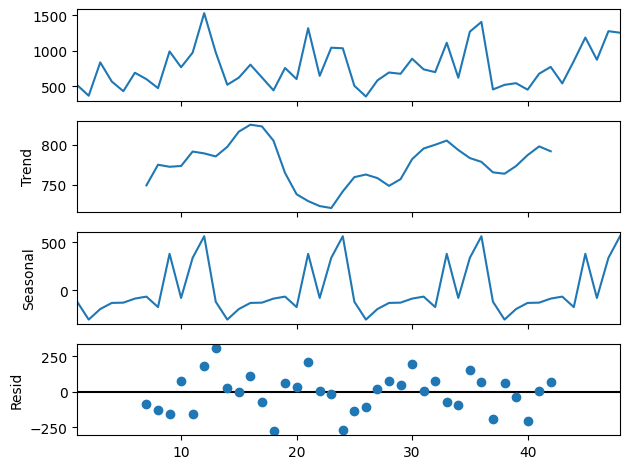

In [55]:
# Decompose data into observation, trend, seasonal, and residual
decompose_data_furniture = seasonal_decompose(period_furniture, period=12)
decompose_data_furniture.plot()
plt.show()

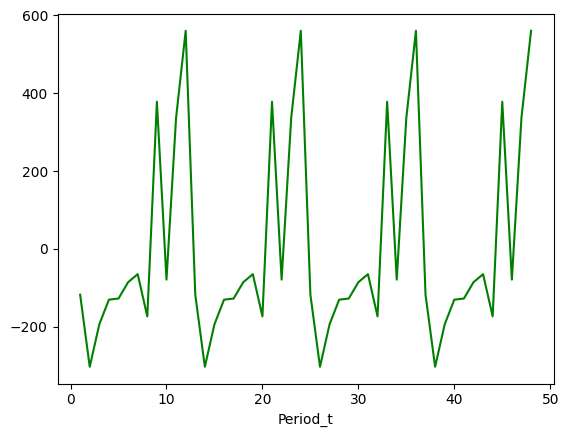

In [56]:
# Visualizing seasonal pattern
seasonality_furniture = decompose_data_furniture.seasonal
seasonality_furniture.plot(color='green')
plt.show()

In [57]:
# Generate Deseasonalizing Demand in a new column
period_furniture['Deseasonalized_data'] = decompose_data_furniture.trend
period_furniture

,Sales,Deseasonalized_data
Period_t,,
1,518.106417,NaN
2,367.931600,NaN
3,837.845176,NaN
4,567.488357,NaN
5,432.049188,NaN
6,691.820084,NaN
7,601.169500,749.227309
8,475.014033,774.839230
9,992.353367,772.325248


In [58]:
period_furniture = period_furniture.fillna(0)  # Fill missing null values with 0
period_furniture = period_furniture.reset_index()  # Resetting index of the dataframe

# Discard rows where 'Deseasonalized_data' is null
data_x_furniture = period_furniture.loc[6:41, :]
data_x_furniture

,Period_t,Sales,Deseasonalized_data
6,7,601.169500,749.227309
7,8,475.014033,774.839230
8,9,992.353367,772.325248
9,10,769.015437,773.305871
10,11,975.956395,791.275959
11,12,1531.867125,788.972374
12,13,978.328467,785.217247
13,14,522.395667,797.113433
14,15,623.045529,816.085518
15,16,805.822962,824.708172


<Axes: xlabel='Period_t'>

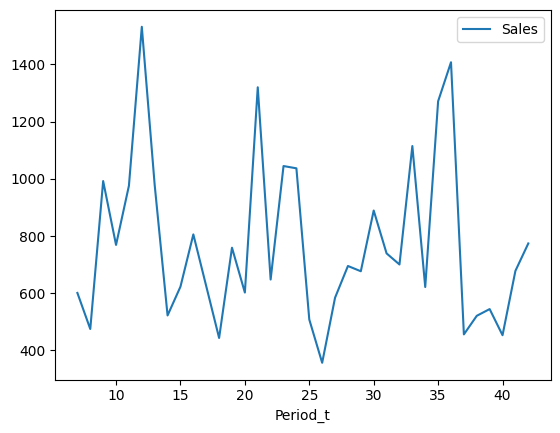

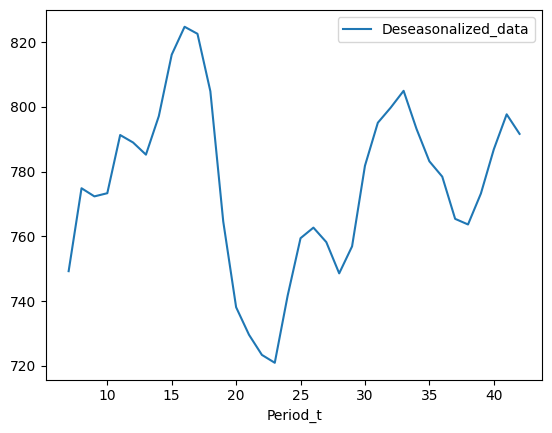

In [59]:
data_x_furniture.plot('Period_t', 'Sales')
data_x_furniture.plot('Period_t', 'Deseasonalized_data')

In [60]:
# Create var *x* to store array of values from *'Deseasonalized_data'* in 2 dimensions
x_furniture = np.array(data_x_furniture['Period_t']).reshape((-1, 1))

# Create var *y* to store array of values from *'Period_t'*
y_furniture = np.array(data_x_furniture['Deseasonalized_data'])

In [61]:
x_furniture, y_furniture  # Display the contents of array x, y

(array([[ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42]], dtype=int64),
 array([749.22730875, 774.83923027, 772.32524772, 773.30587091,
        791.27595911, 788.97237402, 785.21724673, 797.11343337,
        816.0855181 , 824.70817227, 822.53929468, 804.78882286,
        764.57664719, 738.09027245, 729.58358718, 723.37180152,
        720.93383167, 741.67029586, 759.41422093, 762.67660595,
        758.20600951, 748.54918724, 756.88934128, 781.78168397,
        795.07110902, 799.74698911, 804.93438265, 793.1920706 ,
        783.16256426, 778.4227039

In [62]:
model_furniture = LinearRegression()  # Define model as LinearRegression

In [63]:
# Fit x, y values into LinearRegression model
model_furniture.fit(x_furniture, y_furniture)

LinearRegression()

In [64]:
model_furniture.predict(x_furniture)

array([774.47314559, 774.5335114 , 774.59387721, 774.65424302,
       774.71460883, 774.77497463, 774.83534044, 774.89570625,
       774.95607206, 775.01643787, 775.07680368, 775.13716949,
       775.1975353 , 775.25790111, 775.31826692, 775.37863273,
       775.43899854, 775.49936435, 775.55973016, 775.62009597,
       775.68046177, 775.74082758, 775.80119339, 775.8615592 ,
       775.92192501, 775.98229082, 776.04265663, 776.10302244,
       776.16338825, 776.22375406, 776.28411987, 776.34448568,
       776.40485149, 776.4652173 , 776.52558311, 776.58594891])

In [65]:
# Storing intercept value into intercept_furniture
intercept_furniture = model_furniture.intercept_
intercept_furniture

774.0505849230042

In [66]:
# Storing coefficient value into coef_furniture
coef_furniture = model_furniture.coef_
coef_furniture

array([0.06036581])

In [67]:
model_furniture.score(x_furniture, y_furniture)

0.0005782344925936433

In [68]:
# Finding regression values using statsmodels library

x_furniture = period_furniture['Deseasonalized_data']
y_furniture = period_furniture['Period_t']

x_furniture = sm.add_constant(x_furniture)

model_furniture = sm.OLS(y_furniture, x_furniture).fit()
predictions_furniture = model_furniture.predict(x_furniture)

print_model_furniture = model_furniture.summary()
print(print_model_furniture)

                            OLS Regression Results                            
Dep. Variable:               Period_t   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 5.051e-05
Date:                Sun, 09 Jul 2023   Prob (F-statistic):              0.994
Time:                        01:27:53   Log-Likelihood:                -194.28
No. Observations:                  48   AIC:                             392.6
Df Residuals:                      46   BIC:                             396.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.4749    

In [69]:
period_furniture

,Period_t,Sales,Deseasonalized_data
0,1,518.106417,0.000000
1,2,367.931600,0.000000
2,3,837.845176,0.000000
3,4,567.488357,0.000000
4,5,432.049188,0.000000
5,6,691.820084,0.000000
6,7,601.169500,749.227309
7,8,475.014033,774.839230
8,9,992.353367,772.325248
9,10,769.015437,773.305871


In [70]:
# Create a column 'Dt' to store Deseasonalized_data with trend
period_furniture['Dt'] = intercept_furniture + coef_furniture * period_furniture['Period_t']
period_furniture

,Period_t,Sales,Deseasonalized_data,Dt
0,1,518.106417,0.000000,774.110951
1,2,367.931600,0.000000,774.171317
2,3,837.845176,0.000000,774.231682
3,4,567.488357,0.000000,774.292048
4,5,432.049188,0.000000,774.352414
5,6,691.820084,0.000000,774.412780
6,7,601.169500,749.227309,774.473146
7,8,475.014033,774.839230,774.533511
8,9,992.353367,772.325248,774.593877
9,10,769.015437,773.305871,774.654243


In [71]:
# Create new column 'SF' to store calculated values of Seasonal Factor
period_furniture['SF'] = period_furniture['Sales'] / period_furniture['Dt']
period_furniture

,Period_t,Sales,Deseasonalized_data,Dt,SF
0,1,518.106417,0.000000,774.110951,0.669292
1,2,367.931600,0.000000,774.171317,0.475259
2,3,837.845176,0.000000,774.231682,1.082163
3,4,567.488357,0.000000,774.292048,0.732913
4,5,432.049188,0.000000,774.352414,0.557949
5,6,691.820084,0.000000,774.412780,0.893348
6,7,601.169500,749.227309,774.473146,0.776230
7,8,475.014033,774.839230,774.533511,0.613290
8,9,992.353367,772.325248,774.593877,1.281127
9,10,769.015437,773.305871,774.654243,0.992721


In [72]:
# period_furniture['SF'].to_csv('Adaptive Forecasting/St_furniture.csv', index=True)

# Technology Category 

In [73]:
# Preprocess Technology data
def preprocess_technology_data(data):
    data = data.set_index('Order Date')
    data.index
    # Resample the data by month and calculate the average of sales
    data = data['Sales'].resample('MS').mean()

    # Reset the index to separate the year and month into separate columns
    data = data.reset_index()
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Quarter'] = data['Order Date'].dt.quarter

    # Extract the desired columns for Forecasting Methods
    data = data.loc[:, ["Order Date", "Month", "Sales"]]

    # Group the sales by year and quarter
    data = data.groupby(['Order Date', 'Month'])['Sales'].mean()

    data = data.reset_index()

    # Set year as index
    data.set_index('Order Date', inplace=True)
    data.insert(1, 'Period_t', range(1, len(data) + 1))

    return data

technology = preprocess_technology_data(technology)

In [74]:
technology.tail()

,Month,Period_t,Sales
Order Date,,,
2018-08-01,8,44,978.842333
2018-09-01,9,45,1041.146360
2018-10-01,10,46,1493.439227
2018-11-01,11,47,1976.364120
2018-12-01,12,48,946.951304


In [75]:
# Select data from all rows [:] and starting from second column at index = 1 [1:] to drop 'Quarter' column
Monthly_sales_tech = technology.iloc[:, 2:]
period_tech = technology.iloc[:, 1:]
Monthly_sales_tech.head()

,Sales
Order Date,
2015-01-01,449.041429
2015-02-01,229.787143
2015-03-01,2157.331600
2015-04-01,640.938857
2015-05-01,564.698588


In [76]:
period_tech = period_tech.set_index('Period_t')  # Set index to 'Period_t' to get a good plot
period_tech.head()

,Sales
Period_t,
1,449.041429
2,229.787143
3,2157.331600
4,640.938857
5,564.698588


In [77]:
# Plot for technology
fig5 = plt.figure(figsize=(10, 6))
ax5 = fig1.add_subplot(111)
ax5.plot(technology['Sales'], marker='.', mfc='red', ms=12)
ax5.set_xlabel('Months')
ax5.set_ylabel('Average Sales')
ax5.set_title('Monthly Average Sales for Technology')
ax5.grid(True)

# Plot for period
fig6 = plt.figure(figsize=(10, 6))
ax6 = fig2.add_subplot(111)
ax6.plot(period_tech['Sales'], marker='.', mfc='red', ms=12)
ax6.set_xlabel('Months')
ax6.set_ylabel('Average Sales')
ax6.set_title('Monthy Average Sales for Period')
ax6.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

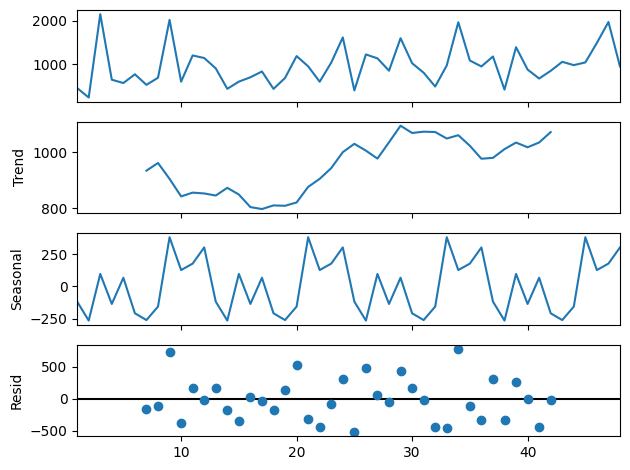

In [78]:
# Decompose data into observation, trend, seasonal, and residual
decompose_data_tech = seasonal_decompose(period_tech, period=12)
decompose_data_tech.plot()
plt.show()

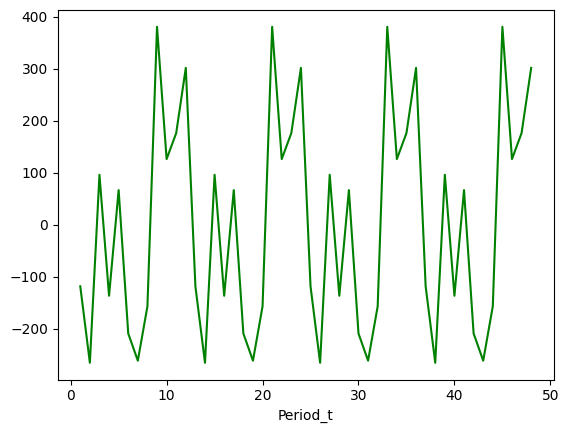

In [79]:
# Visualizing seasonal pattern
seasonality_tech = decompose_data_tech.seasonal
seasonality_tech.plot(color='green')
plt.show()

In [80]:
# Generate Deseasonalizing Demand in a new column
period_tech['Deseasonalized_data'] = decompose_data_tech.trend
period_tech

,Sales,Deseasonalized_data
Period_t,,
1,449.041429,NaN
2,229.787143,NaN
3,2157.331600,NaN
4,640.938857,NaN
5,564.698588,NaN
6,766.905909,NaN
7,522.618933,934.539057
8,687.465385,961.869885
9,2025.583200,905.232592


In [81]:
period_tech = period_tech.fillna(0)  # Fill missing null values with 0
period_tech = period_tech.reset_index()  # Resetting index of the dataframe

# Discard rows where 'Deseasonalized_data' is null
data_x_tech = period_tech.loc[6:41, :]
data_x_tech


,Period_t,Sales,Deseasonalized_data
6,7,522.618933,934.539057
7,8,687.465385,961.869885
8,9,2025.583200,905.232592
9,10,596.900900,842.565572
10,11,1202.936960,856.047443
11,12,1142.956889,853.091725
12,13,903.647200,845.668029
13,14,431.121250,873.180395
14,15,596.702471,849.257779
15,16,697.559500,804.386463


In [82]:
# Create var *x* to store array of values from *'Deseasonalized_data'* in 2 dimensions
x_tech = np.array(data_x_tech['Period_t']).reshape((-1, 1))

# Create var *y* to store array of values from *'Period_t'*
y_tech = np.array(data_x_tech['Deseasonalized_data'])

x_tech, y_tech  # Display the contents of array x, y

(array([[ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42]], dtype=int64),
 array([ 934.53905654,  961.86988481,  905.23259222,  842.56557194,
         856.04744327,  853.09172493,  845.66802871,  873.18039538,
         849.25777871,  804.38646251,  797.42233348,  810.41093513,
         809.04949366,  820.94177729,  876.49251832,  905.26846143,
         943.69964099, 1000.54999139, 1030.33554833, 1006.01008925,
         977.50758989, 1035.69463422, 1095.01877888, 1069.01465867,
        1073.68319051, 1072.43085539, 1049.25792809, 1061.08129126,
     

In [83]:
model_tech = LinearRegression()  # Define model as LinearRegression

In [84]:
# Fit x, y values into LinearRegression model
model_tech.fit(x_tech, y_tech)

LinearRegression()

In [85]:
model_tech.predict(x_tech)

array([ 834.62201728,  841.39247841,  848.16293954,  854.93340067,
        861.70386181,  868.47432294,  875.24478407,  882.0152452 ,
        888.78570633,  895.55616746,  902.3266286 ,  909.09708973,
        915.86755086,  922.63801199,  929.40847312,  936.17893426,
        942.94939539,  949.71985652,  956.49031765,  963.26077878,
        970.03123991,  976.80170105,  983.57216218,  990.34262331,
        997.11308444, 1003.88354557, 1010.6540067 , 1017.42446784,
       1024.19492897, 1030.9653901 , 1037.73585123, 1044.50631236,
       1051.2767735 , 1058.04723463, 1064.81769576, 1071.58815689])

In [86]:
# Storing intercept value into intercept_tech
intercept_tech = model_tech.intercept_
intercept_tech

787.2287893561125

In [87]:
# Storing coefficient value into coef_tech
coef_tech = model_tech.coef_
coef_tech

array([6.77046113])

In [88]:
model_tech.score(x_tech, y_tech)

0.5576094203666917

In [89]:
# Finding regression values using statsmodels library

x_tech = period_tech['Deseasonalized_data']
y_tech = period_tech['Period_t']

x_tech = sm.add_constant(x_tech)

model_tech = sm.OLS(y_tech, x_tech).fit()
predictions_tech = model_tech.predict(x_tech)

print_model_tech = model_tech.summary()
print(print_model_tech)

                            OLS Regression Results                            
Dep. Variable:               Period_t   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4103
Date:                Sun, 09 Jul 2023   Prob (F-statistic):              0.525
Time:                        01:27:55   Log-Likelihood:                -194.07
No. Observations:                  48   AIC:                             392.1
Df Residuals:                      46   BIC:                             395.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  22.2867    

In [90]:
period_tech

,Period_t,Sales,Deseasonalized_data
0,1,449.041429,0.000000
1,2,229.787143,0.000000
2,3,2157.331600,0.000000
3,4,640.938857,0.000000
4,5,564.698588,0.000000
5,6,766.905909,0.000000
6,7,522.618933,934.539057
7,8,687.465385,961.869885
8,9,2025.583200,905.232592
9,10,596.900900,842.565572


In [91]:
# Create a column 'Dt' to store Deseasonalized_data with trend
period_tech['Dt'] = intercept_tech + coef_tech * period_tech['Period_t']
period_tech

,Period_t,Sales,Deseasonalized_data,Dt
0,1,449.041429,0.000000,793.999250
1,2,229.787143,0.000000,800.769712
2,3,2157.331600,0.000000,807.540173
3,4,640.938857,0.000000,814.310634
4,5,564.698588,0.000000,821.081095
5,6,766.905909,0.000000,827.851556
6,7,522.618933,934.539057,834.622017
7,8,687.465385,961.869885,841.392478
8,9,2025.583200,905.232592,848.162940
9,10,596.900900,842.565572,854.933401


In [92]:
# Create new column 'SF' to store calculated values of Seasonal Factor
period_tech['SF'] = period_tech['Sales'] / period_tech['Dt']
period_tech

,Period_t,Sales,Deseasonalized_data,Dt,SF
0,1,449.041429,0.000000,793.999250,0.565544
1,2,229.787143,0.000000,800.769712,0.286958
2,3,2157.331600,0.000000,807.540173,2.671485
3,4,640.938857,0.000000,814.310634,0.787094
4,5,564.698588,0.000000,821.081095,0.687750
5,6,766.905909,0.000000,827.851556,0.926381
6,7,522.618933,934.539057,834.622017,0.626174
7,8,687.465385,961.869885,841.392478,0.817057
8,9,2025.583200,905.232592,848.162940,2.388201
9,10,596.900900,842.565572,854.933401,0.698184


In [93]:
# period['SF'].to_csv('Adaptive Forecasting/St.csv', index=True)